In [2]:
#import liberaries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/sonunancy/Desktop/movies.csv')

In [3]:
# lets look into the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
# Let's see if there is some missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Data Types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#change data type of columnsa
df['budget']=pd.to_numeric(df['budget'],errors='coerce').fillna(0).astype(int)
df['budget']= df['budget'].astype('int')

df['gross']=pd.to_numeric(df['gross'],errors='coerce').fillna(0).astype(int)
df['gross']= df['gross'].astype('int')



In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [9]:
#create correct year column
df['year_correct'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')
df['year']=df['year_correct'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25


In [10]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
# Drop any duplicates

df=df.drop_duplicates()

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


In [15]:
# Budget high correlation.
# company high correlation.

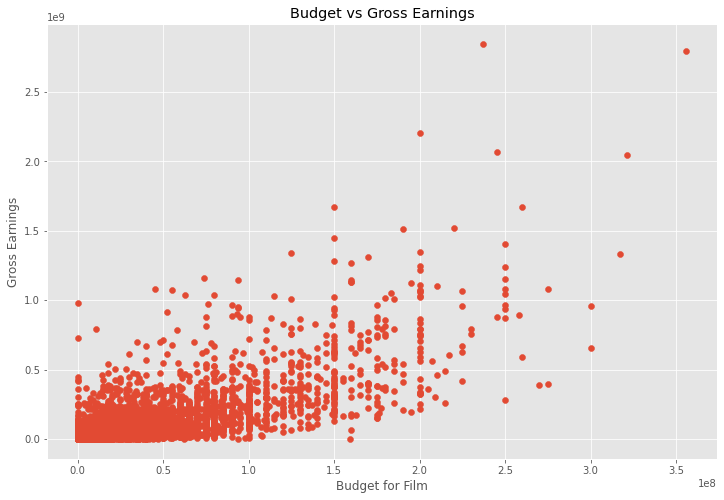

In [16]:
# Scatter plot with budget vs gross


plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


<AxesSubplot:xlabel='budget', ylabel='gross'>

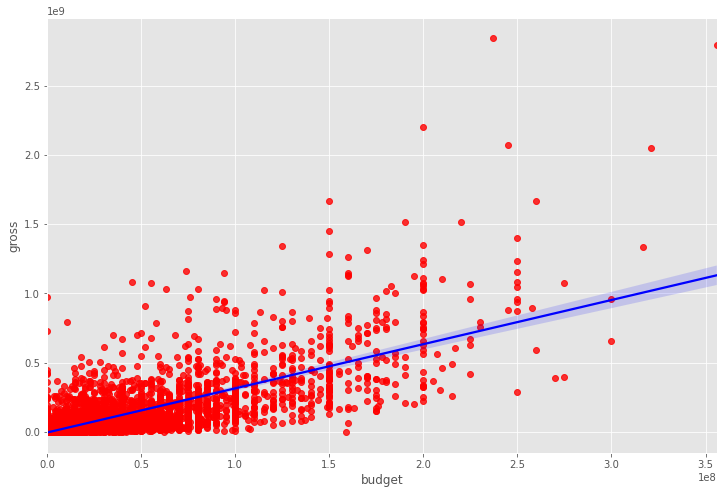

In [18]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [19]:
# Let's start looking at correlation

In [20]:
df.corr(method='pearson') #pearson by default ,kendall, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


In [21]:
# high correlation between budget and gross

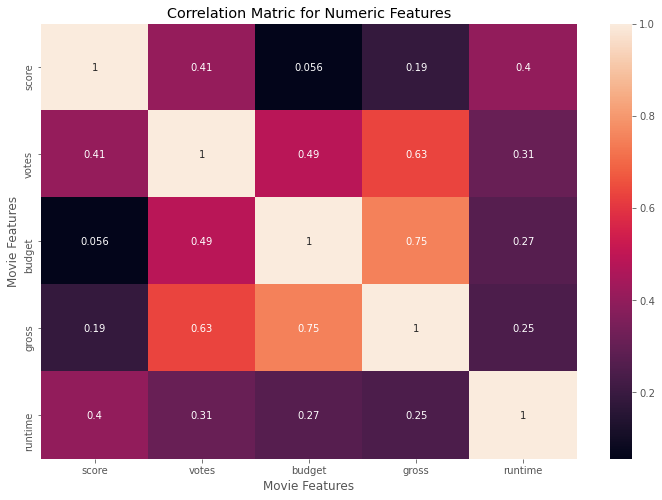

In [22]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
# Looks at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


In [24]:
df_numerized=df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,532,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009-12-18
7445,534,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019-04-26
3045,6895,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997-12-19
6663,5143,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015-12-18
7244,535,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018-04-27


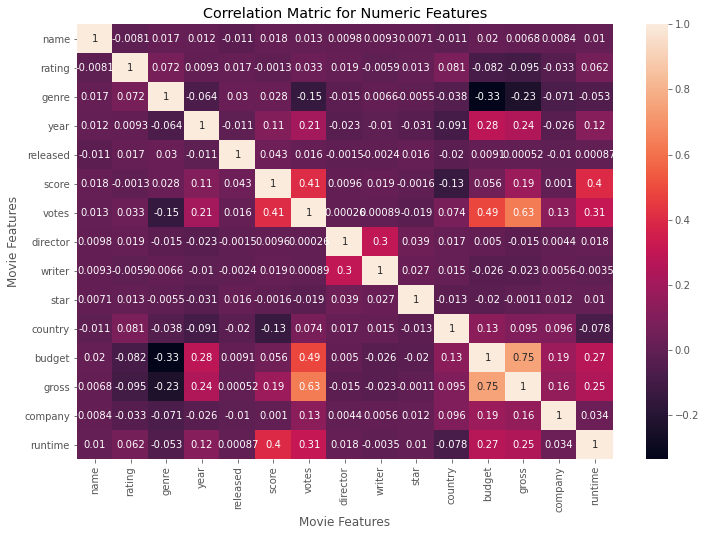

In [25]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008117,0.016742,0.012278,-0.011491,0.017662,0.012850,0.009754,0.009259,0.007059,-0.010538,0.020249,0.006779,0.008356,0.010118
rating,-0.008117,1.000000,0.072423,0.009280,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145
genre,0.016742,0.072423,1.000000,-0.063573,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711
year,0.012278,0.009280,-0.063573,1.000000,-0.010573,0.107219,0.206475,-0.022579,-0.010063,-0.031166,-0.090962,0.284783,0.243478,-0.026492,0.115317
released,-0.011491,0.016613,0.029822,-0.010573,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868
score,0.017662,-0.001314,0.027965,0.107219,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451
votes,0.012850,0.033225,-0.145307,0.206475,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212
director,0.009754,0.019483,-0.015258,-0.022579,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624
writer,0.009259,-0.005921,0.006567,-0.010063,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511
star,0.007059,0.013405,-0.005477,-0.031166,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174


In [35]:
correlation_mat =df_numerized.corr()

corr_pairs=correlation_mat.unstack()

corr_pairs


name      name        1.000000
          rating     -0.008117
          genre       0.016742
          year        0.012278
          released   -0.011491
          score       0.017662
          votes       0.012850
          director    0.009754
          writer      0.009259
          star        0.007059
          country    -0.010538
          budget      0.020249
          gross       0.006779
          company     0.008356
          runtime     0.010118
rating    name       -0.008117
          rating      1.000000
          genre       0.072423
          year        0.009280
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     name        0.016742
          rating      0.072423
        

In [36]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
country   year       -0.090962
year      country    -0.090962
rating    budget     -0.081939
budget    rating     -0.081939
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
          year       -0.063573
year      genre      -0.063573
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
star      year       -0.031166
year      star       -0.031166
company   year       -0.026492
year      company    -0.026492
budget    writer     -0.025911
writer    budget     -0.025911
gross   

In [37]:
high_corr=sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [32]:
# Votes and budget have the highest correlation to gross earning.
#Company has low corelation